In [64]:
from matplotlib import pyplot as plt
import math

In [200]:
NUM_SAMPLES = 10000
SAMPLE_RATE = 44100
X_AXIS = range(NUM_SAMPLES)

In [362]:
def square_wave(freq, sample_rate = SAMPLE_RATE, num_samples = NUM_SAMPLES):
    period_samples = sample_rate / freq
    out = []
    for i in range(num_samples):
        if (i // (period_samples // 2)) % 2 == 0:
            out.append(1)
        else:
            out.append(-1)
    return out

def moving_average_filter(samples, width):
    out = []
    for i in range(len(samples)):
        total = 0
        for j in range(width):
            total += samples[max(i - j, 0)]
        out.append(total / width)
    return out

def state_variable_first_order_filter(sample, cutoff, resonance):
    lp = 0
    bp = 0
    hp = 0
    out = []
    for x in sample:
        lp_ = lp + cutoff * bp
        bp_ = x - lp - (resonance * bp)
        hp = x - lp_ - bp
        lp = lp_
        bp = bp_
        out.append(lp)
    return out

def butterworth_filter(samples, half_power_frequency, n=1):
    f = half_power_frequency / 2
    a = math.tan(math.pi * f)
    a2 = a * a

    A = []
    d1 = []
    d2 = []
    
    for i in range(n):
        r = math.sin(math.pi * (2 * i + 1) / (4 * n))
        s = a2 + 2 * a * r + 1
        A.append(a2 / s)
        d1.append(2 * (1 - a2) / s)
        d2.append(-(a2 - 2 * a * r + 1) / s)
    
    w0 = [0 for _ in range(n)]
    w1 = [0 for _ in range(n)]
    w2 = [0 for _ in range(n)]

    out = []
    
    for x in samples:
        for i in range(n):
            w0[i] = (d1[i] * w1[i]) + (d2[i] * w2[i]) + x
            x = A[i] * (w0[i] + (2 * w1[i]) + w2[i])
            w2[i] = w1[i]
            w1[i] = w0[i]
        out.append(x)
    return out


def chebyshev_filter(samples, cutoff_01, epsilon, m=1):
    cutoff = cutoff_01 / 2
    n = m * 2
    a = math.tan(math.pi * cutoff)
    a2 = a * a
    u = math.log((1 + math.sqrt(1 + (epsilon * epsilon))) / epsilon)
    su = math.sinh(u / n)
    cu = math.cosh(u / n)
    
    A = []
    d1 = []
    d2 = []
    
    for i in range(m):
        z = (math.pi * ((2 * i) + 1)) / (2 * n)
        b = math.sin(z) * su
        c = math.cos(z) * cu
        c = (b * b) + (c * c)
        s = (a2 * c) + (2 * a * b) + 1.0
        A.append(a2 / (4 * s))
        d1.append((2 * (1 - (a2 * c))) / s)
        d2.append(-((a2 * c) - (2 * a * b) + 1) / s)
    
    w0 = [0 for _ in range(m)]
    w1 = [0 for _ in range(m)]
    w2 = [0 for _ in range(m)]
    
    out = []
    
    #epsilon = 2 / epsilon
    #epsilon = 1
    scale = (1 - math.exp(-epsilon)) / 2

    for x in samples:
        for i in range(m):
            w0[i] = (d1[i] * w1[i]) + (d2[i] * w2[i]) + x
            x = A[i] * (w0[i] + (2 * w1[i]) + w2[i])
            w2[i] = w1[i]
            w1[i] = w0[i]
        out.append(x / scale)
    return out


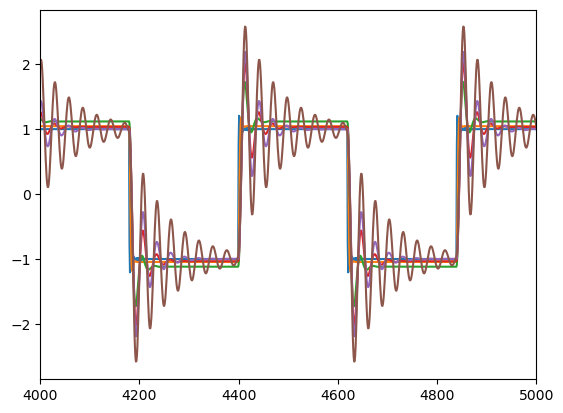

In [363]:
fig, ax = plt.subplots()

signal = square_wave(100)

ax.plot(X_AXIS, chebyshev_filter(signal, 0.1, 0.0001,1))
ax.plot(X_AXIS, chebyshev_filter(signal, 0.1, 0.1,1))
ax.plot(X_AXIS, chebyshev_filter(signal, 0.1, 1,1))
ax.plot(X_AXIS, chebyshev_filter(signal, 0.1, 2,1))
ax.plot(X_AXIS, chebyshev_filter(signal, 0.1, 3,1))
ax.plot(X_AXIS, chebyshev_filter(signal, 0.1, 8,1))
plt.xlim(4000, 5000)
plt.show()


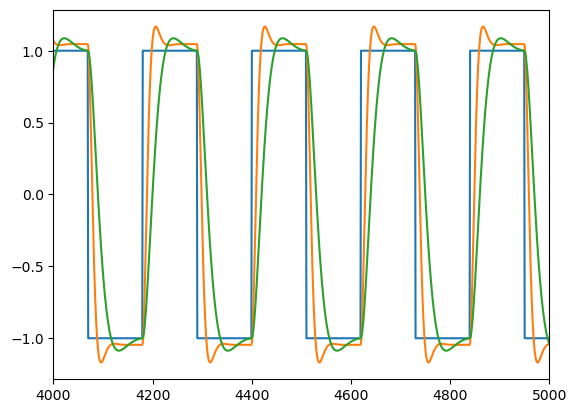

In [383]:
fig, ax = plt.subplots()

signal = square_wave(200)

#ch = chebyshev_filter_chain(signal, 0.1, 0.1,1)
#print("xxx", ch[4000], (ch[4000] * 2) / 0.1)

ax.plot(X_AXIS, signal)
#ax.plot(X_AXIS, moving_average_filter(signal, 50))
#ax.plot(X_AXIS, state_variable_first_order_filter(signal, 0.02, 0.5))
ax.plot(X_AXIS, chebyshev_filter(signal, 1000 / SAMPLE_RATE, 0.1,1))
ax.plot(X_AXIS, butterworth_filter(signal, 1000 / SAMPLE_RATE, 1))
plt.xlim(4000, 5000)
plt.show()
